# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#supress alll warings
import warnings
warnings.filterwarnings("ignore")

### Loading the diabetes dataset and getting to know the dataset

In [2]:
diabetes_data= pd.read_csv('E:\python\internship\diabetes.csv') 

# number of rows and Columns in this dataset
diabetes_data.shape

# getting the statistical measures of the data
diabetes_data.describe()

diabetes_data['Outcome'].value_counts()

diabetes_data.groupby('Outcome').mean()

# separating the data and labels
X = diabetes_data.drop(columns = 'Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### PERFORM DATA CLEANING AND HANDLE MISSING VALUES

In [3]:

# Check for missing values in the dataset
missing_values = diabetes_data.isnull().sum()

# Check for invalid values (e.g., zero values in non-zero fields)
invalid_values_summary = (diabetes_data == 0).sum()

missing_values, invalid_values_summary


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 Pregnancies                 111
 Glucose                       5
 BloodPressure                35
 SkinThickness               227
 Insulin                     374
 BMI                          11
 DiabetesPedigreeFunction      0
 Age                           0
 Outcome                     500
 dtype: int64)

In [4]:
# Compare mean and median values for each feature by Outcome
grouped = diabetes_data.groupby('Outcome').mean()
print("Mean values grouped by Outcome:\n", grouped)

# Replace invalid zero values with the mean for specific columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_impute:
    mean_value = diabetes_data[column].mean()
    diabetes_data[column] = diabetes_data[column].replace(0, mean_value)

# Verify if invalid values are replaced
(diabetes_data == 0).sum()
 

Mean values grouped by Outcome:
          Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Perform EDA to understand the data.

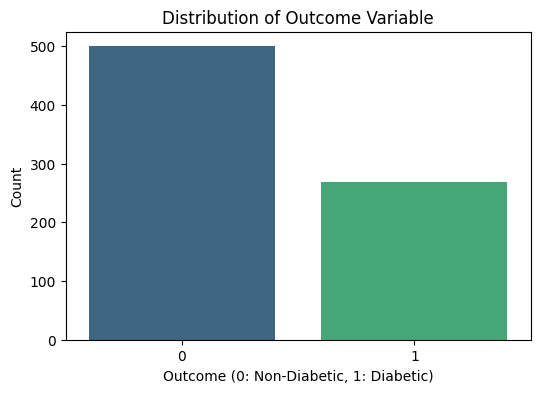

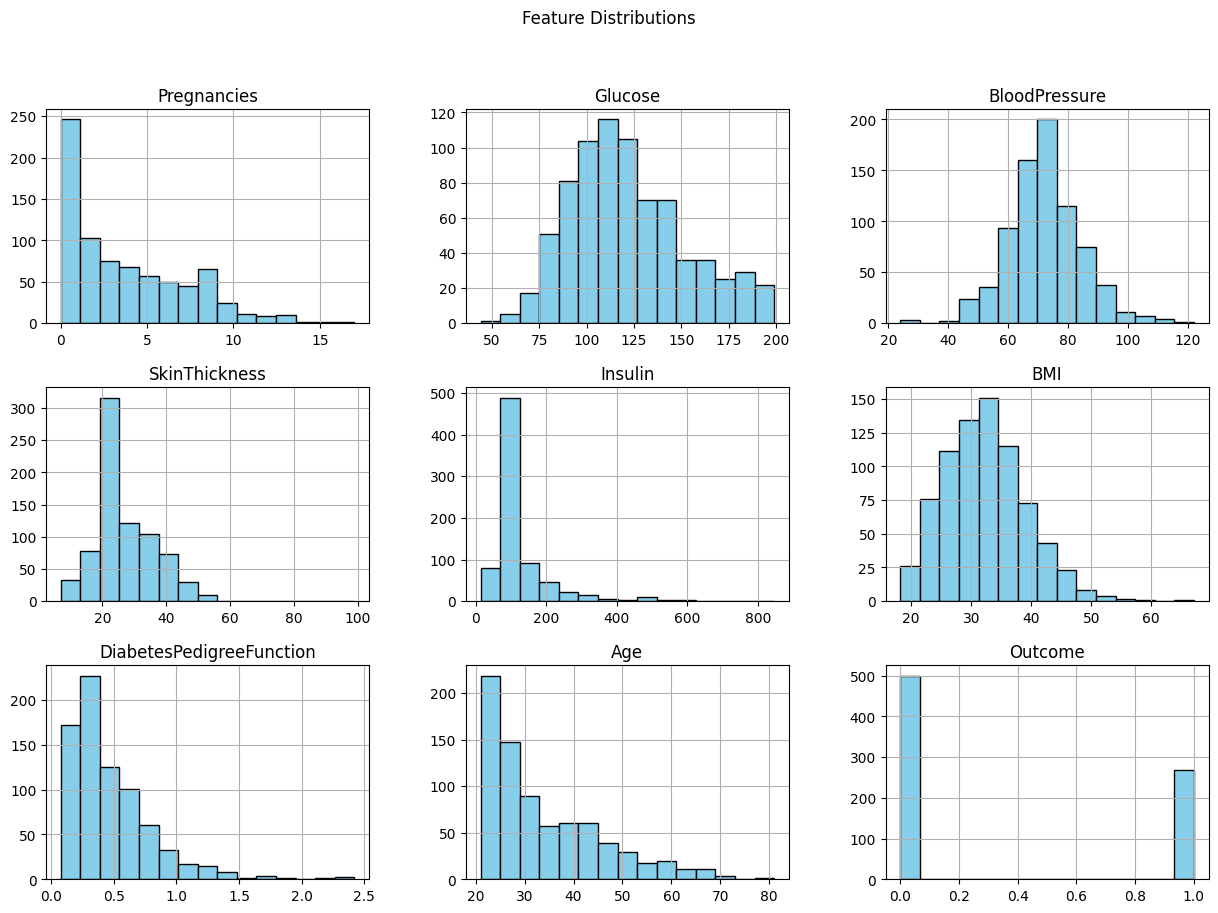

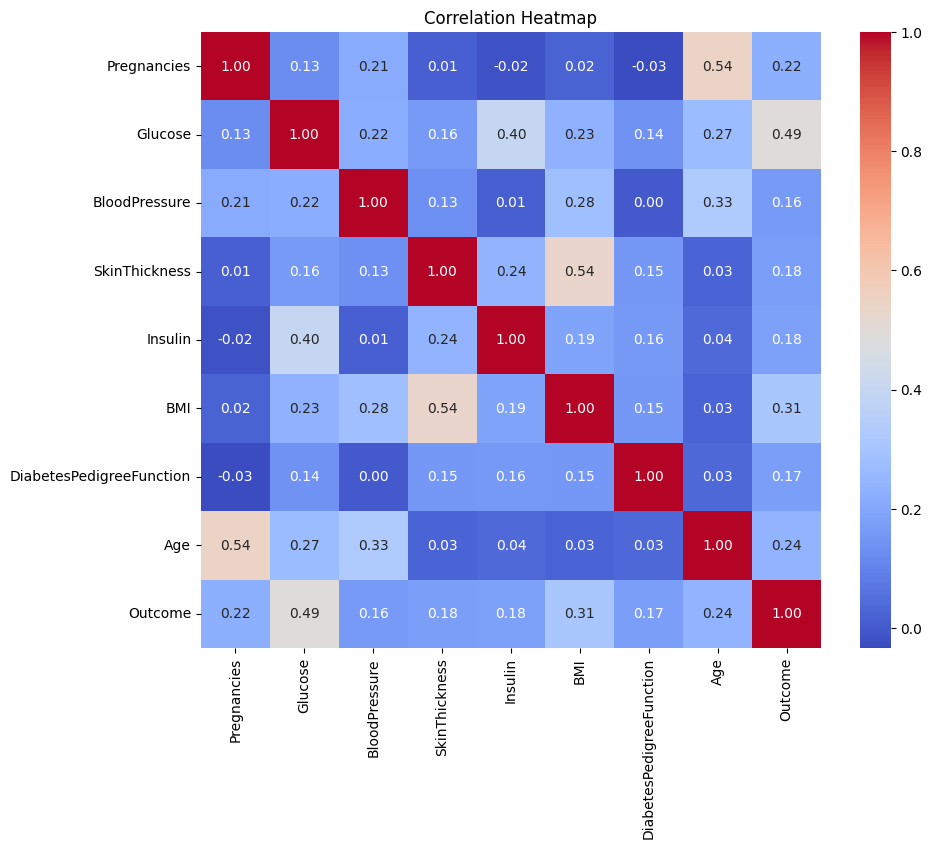

In [5]:
# Statistical summary
statistical_summary = diabetes_data.describe()

# Distribution of the Outcome variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_data, palette='viridis')
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

statistical_summary

# Visualize distributions for all numerical features
diabetes_data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()



### Split data into training, validation, and test sets

In [6]:
print("X shape:", X.shape)
print("y shape:", y.shape)


# Separate features and target variable
X = diabetes_data.drop(columns='Outcome')  # Features
y = diabetes_data['Outcome']  # Target variable

# First split: Training and temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify the sizes of the splits
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


X shape: (768, 8)
y shape: (768,)
Training set: (537, 8), Validation set: (115, 8), Test set: (116, 8)


###  MODEL and ACCURACY 

In [7]:
classifier = svm.SVC(kernel='linear')

#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('\nAccuracy score of the training data : ', training_data_accuracy)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy ,'\n')


Accuracy score of the training data :  0.7858472998137802
Accuracy score of the test data :  0.75 



### Model Selection ,Building and Training 

In [9]:

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_val_pred_lr = log_reg.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_val_pred_lr)

# Train Random Forest
rf_clf.fit(X_train, y_train)
y_val_pred_rf = rf_clf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

# Compare Validation Accuracies
print("Logistic Regression Validation Accuracy:", lr_accuracy)
print("Random Forest Validation Accuracy:", rf_accuracy)

# Evaluate the best model on the test set
best_model = rf_clf if rf_accuracy > lr_accuracy else log_reg
y_test_pred = best_model.predict(X_test)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Logistic Regression Validation Accuracy: 0.7130434782608696
Random Forest Validation Accuracy: 0.7652173913043478

Test Set Performance:
Accuracy: 0.7327586206896551
Confusion Matrix:
 [[67  8]
 [23 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81        75
           1       0.69      0.44      0.54        41

    accuracy                           0.73       116
   macro avg       0.72      0.67      0.67       116
weighted avg       0.73      0.73      0.71       116



In [10]:
# Feature Engineering
from sklearn.feature_selection import RFE

rfe_model = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe_model.fit(X_train, y_train)

print("Selected Features:", list(X.columns[rfe_model.support_]))


## Apply Cross-Validation
# Evaluate Random Forest with cross-validation
cv_scores_rf = cross_val_score(rfe_model, X, y, cv=5, scoring='accuracy')

print("\nRandom Forest Cross-Validation Accuracy:", cv_scores_rf.mean(),'\n')

Selected Features: ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Random Forest Cross-Validation Accuracy: 0.7539682539682541 



In [11]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [12]:

import pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
